In [27]:
from collections import namedtuple
import numpy as np

In [28]:
Data = namedtuple('Data', ['x', 'y', 'sy'])

In [29]:
data = Data(x=[30, 40, 50], y=[34.7, 36.3, 30.0], sy=[0.8, 0.1, 0.1])

In [30]:
X = np.matrix([[x**2, x, 1] for x in data.x])
Sy = np.diag([s**2 for s in data.sy])
y = np.array(data.y)

In [31]:
B = X.T.dot(X).I.dot(X.T).dot(y).A[0]; print(f'B = {B}')
S = np.sqrt(np.diag(X.T.dot(X).I.dot(X.T).dot(Sy).dot(X).dot(X.T.dot(X).I))); print(f'S = {S}')

B = [ -0.0395   2.925  -17.5   ]
S = [  4.15331193e-03   3.70438929e-01   8.16149496e+00]


In [32]:
maxloc = -B[1]/(2*B[0]); print(f'maxloc = {maxloc}')

maxloc = 37.02531645568926


In [33]:
maxunc = 1/(2 * B[0]**2) * np.sqrt(B[1]**2 * S[0]**2 + B[0]**2 * S[1]**2); print(f'maxunc = {maxunc}')

maxunc = 6.0945825842713806


In [34]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib
import matplotlib.pyplot as plt

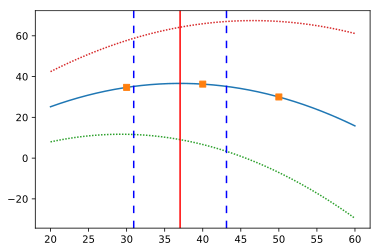

In [40]:
x = np.arange(min(20, maxloc - maxunc), max(60, maxloc + maxunc), 0.01)
plt.plot(x, quadratic.fcn(B, x))
plt.errorbar(data.x, data.y, yerr=data.sy, fmt='s')
plt.plot(x, quadratic.fcn(B - S, x), dashes=[1])
plt.plot(x, quadratic.fcn(B + S, x), dashes=[1])
plt.axvline(maxloc, color='r')
plt.axvline(maxloc - maxunc, color='b', dashes=[5])
plt.axvline(maxloc + maxunc, color='b', dashes=[5])